In [10]:
import keras
keras.__version__
import csv
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers
import pandas as pd
from time import gmtime, strftime


csvfile=open('C:/git/cropped/result.csv');
reader = csv.DictReader(csvfile)

image_array  = np.empty([])
image_labels=np.empty((1))

img = image.load_img('C:/git/cropped/sample1.jpg',grayscale=True)  # this is a PIL image
image_array_size = image.img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
image_array_size= image_array_size.reshape((1,) + image_array_size.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
image_array=np.empty(image_array_size.shape)
image_array_size.shape


(1, 13, 301, 1)

In [11]:
import keras
keras.__version__

'2.1.4'

In [13]:
image_array.dump

<function ndarray.dump>

In [14]:
next(reader)

img=image.load_img(row['filePath'],grayscale=True)
x_value=row['x']
image_array[0]= image.img_to_array(img)
image_labels[0]=x_value

next(reader)


for row in reader:
      #  print(row['x'], row['y'],row['filePath'])
        img=image.load_img(row['filePath'],grayscale=True)
        x_value=row['x']
        image_array= np.append(image_array,[image.img_to_array(img)],axis=0)
        image_labels=np.append(image_labels,x_value)
        #x = np.append(x, )



In [15]:
#np.squeeze(image_array, axis=3).shape
image_array.shape

(473, 13, 301, 1)

In [16]:
image_labels.shape

(473,)

'154.888229'

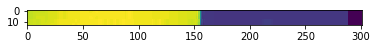

In [17]:
plt.imshow(np.squeeze(image_array[0], axis=2))
image_labels[0]

'107.566246'

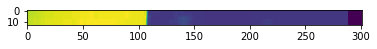

In [18]:
plt.imshow(np.squeeze(image_array[4], axis=2))
image_labels[4]

'160.122116'

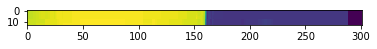

In [19]:
plt.imshow(np.squeeze(image_array[5], axis=2))
image_labels[5]

'117.07312'

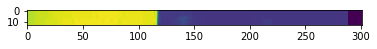

In [20]:
plt.imshow(np.squeeze(image_array[6], axis=2))
image_labels[6]

In [21]:
image_array[3].shape

(13, 301, 1)

In [22]:
image_labels[3]

'152.385468'

In [23]:
image_labels

array(['154.888229', '207.192993', '99.226677', '152.385468', '107.566246',
       '160.122116', '117.07312', '142.775421', '106.087975', '136.91156',
       '115.228539', '155.422791', '196.123276', '102.695328', '155.43663',
       '103.915276', '134.6707', '109.622116', '122.580284', '110.657669',
       '148.667923', '110.997406', '138.187805', '194.741257',
       '116.708481', '153.688629', '109.461647', '159.791092', '99.025284',
       '149.253143', '112.981071', '152.73642', '113.814461', '154.775711',
       '154.024506', '119.933556', '150.810364', '106.79084', '151.905685',
       '109.834557', '155.275299', '119.893448', '163.030563',
       '110.753433', '162.431702', '113.085526', '107.304756',
       '136.944763', '101.227585', '156.257278', '113.845451',
       '149.071854', '112.559135', '161.975174', '119.5289', '116.918449',
       '113.496269', '106.418221', '143.299026', '112.592712',
       '159.796967', '122.819305', '142.271149', '126.278687',
       '134.82794

In [24]:
from keras import models
from keras import layers
from keras.optimizers import RMSprop, Adam, Adadelta
from keras.layers.core import Dense, Dropout, Activation, Flatten

network = models.Sequential()
nb_filters = 8
nb_conv=3

network.add(keras.layers.Conv2D(nb_filters, kernel_size=(nb_conv, nb_conv), activation='relu',data_format='channels_last',
                        input_shape=(13, 301, 1), padding="same" ) )

#network.add(keras.layers.Conv2D(nb_filters, kernel_size=(nb_conv, nb_conv), activation='relu',data_format='channels_last',
 #                   padding="same" ) )
#network.add(keras.layers.Conv2D(nb_filters, kernel_size=(nb_conv, nb_conv), activation='relu',data_format='channels_last',
#                        padding="same" ) )
network.add(keras.layers.Conv2D(nb_filters, kernel_size=(nb_conv, nb_conv), activation='relu',data_format='channels_last',
                         padding="same" ) )
network.add(keras.layers.Conv2D(nb_filters, kernel_size=(nb_conv, nb_conv), activation='relu',data_format='channels_last',
                        padding="same" ) )

network.add(layers.MaxPooling2D((2, 2)))


#network.add(keras.layers.core.Dropout(0.25))


#network.add(keras.layers.Conv2D(nb_filters*2, kernel_size=(nb_conv, nb_conv), activation='relu',data_format='channels_last',
#                        padding="same" ) )
#network.add(keras.layers.Conv2D(nb_filters*2, kernel_size=(nb_conv, nb_conv), activation='relu',data_format='channels_last',
#                        padding="same" ) )
network.add(keras.layers.Conv2D(nb_filters*2, kernel_size=(nb_conv, nb_conv), activation='relu',data_format='channels_last',
                        padding="same" ) )
network.add(keras.layers.Conv2D(nb_filters*2, kernel_size=(nb_conv, nb_conv), activation='relu',data_format='channels_last',
                        padding="same" ) )


#network.add(keras.layers.core.Dropout(0.5))

network.add(layers.MaxPooling2D((2, 2)))


network.add(Flatten())
network.add(Dense(256, activation='relu'))

#network.add(keras.layers.core.Dropout(0.5))
network.add(Dense(128, activation='linear'))

#network.add(keras.layers.core.Dropout(0.5))
network.add(Dense(1, activation='linear'))


network.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0001))


In [25]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 301, 8)        80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 301, 8)        584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 301, 8)        584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 150, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 150, 16)        1168      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 150, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 75, 16)         0         
__________

In [26]:
 from sklearn.model_selection import train_test_split
image_array = image_array.astype('float32') / 255
X_train, X_test, y_train, y_test = train_test_split(image_array, image_labels, test_size=0.1, random_state=42)
X_train.shape


(425, 13, 301, 1)

In [27]:
image_labels


array(['154.888229', '207.192993', '99.226677', '152.385468', '107.566246',
       '160.122116', '117.07312', '142.775421', '106.087975', '136.91156',
       '115.228539', '155.422791', '196.123276', '102.695328', '155.43663',
       '103.915276', '134.6707', '109.622116', '122.580284', '110.657669',
       '148.667923', '110.997406', '138.187805', '194.741257',
       '116.708481', '153.688629', '109.461647', '159.791092', '99.025284',
       '149.253143', '112.981071', '152.73642', '113.814461', '154.775711',
       '154.024506', '119.933556', '150.810364', '106.79084', '151.905685',
       '109.834557', '155.275299', '119.893448', '163.030563',
       '110.753433', '162.431702', '113.085526', '107.304756',
       '136.944763', '101.227585', '156.257278', '113.845451',
       '149.071854', '112.559135', '161.975174', '119.5289', '116.918449',
       '113.496269', '106.418221', '143.299026', '112.592712',
       '159.796967', '122.819305', '142.271149', '126.278687',
       '134.82794

In [28]:


history=network.fit(X_train,y_train, epochs=1000, batch_size=100,validation_split=0.1)

Train on 382 samples, validate on 43 samples
Epoch 1/1000
382/382 [==============================] - 4s 9ms/step - loss: 27730.0615 - val_loss: 24461.5957
Epoch 2/1000
382/382 [==============================] - 0s 471us/step - loss: 27599.6269 - val_loss: 24328.2031
Epoch 3/1000
382/382 [==============================] - 0s 456us/step - loss: 27442.7823 - val_loss: 24167.0879
Epoch 4/1000
382/382 [==============================] - 0s 442us/step - loss: 27254.0735 - val_loss: 23966.0898
Epoch 5/1000
382/382 [==============================] - 0s 429us/step - loss: 27010.2246 - val_loss: 23713.6230
Epoch 6/1000
382/382 [==============================] - 0s 429us/step - loss: 26705.5910 - val_loss: 23389.3867
Epoch 7/1000
382/382 [==============================] - 0s 437us/step - loss: 26316.6384 - val_loss: 22971.4902
Epoch 8/1000
382/382 [==============================] - 0s 435us/step - loss: 25808.7712 - val_loss: 22435.3555
Epoch 9/1000
382/382 [==============================] - 0s 42

382/382 [==============================] - 0s 421us/step - loss: 34.3241 - val_loss: 24.0740
Epoch 76/1000
382/382 [==============================] - 0s 427us/step - loss: 32.2903 - val_loss: 21.9218
Epoch 77/1000
382/382 [==============================] - 0s 432us/step - loss: 30.5651 - val_loss: 20.0639
Epoch 78/1000
382/382 [==============================] - 0s 421us/step - loss: 28.9753 - val_loss: 18.2789
Epoch 79/1000
382/382 [==============================] - 0s 427us/step - loss: 27.4062 - val_loss: 17.1509
Epoch 80/1000
382/382 [==============================] - 0s 421us/step - loss: 26.0565 - val_loss: 16.4410
Epoch 81/1000
382/382 [==============================] - 0s 427us/step - loss: 24.8326 - val_loss: 15.2205
Epoch 82/1000
382/382 [==============================] - 0s 435us/step - loss: 23.7569 - val_loss: 14.2532
Epoch 83/1000
382/382 [==============================] - 0s 427us/step - loss: 22.7637 - val_loss: 13.4074
Epoch 84/1000
382/382 [============================

Epoch 152/1000
382/382 [==============================] - 0s 424us/step - loss: 14.7485 - val_loss: 7.4207
Epoch 153/1000
382/382 [==============================] - 0s 419us/step - loss: 14.7636 - val_loss: 7.3703
Epoch 154/1000
382/382 [==============================] - 0s 419us/step - loss: 14.7228 - val_loss: 7.2630
Epoch 155/1000
382/382 [==============================] - 0s 419us/step - loss: 14.6837 - val_loss: 7.1609
Epoch 156/1000
382/382 [==============================] - 0s 445us/step - loss: 14.6893 - val_loss: 7.1193
Epoch 157/1000
382/382 [==============================] - 0s 427us/step - loss: 14.6357 - val_loss: 7.2422
Epoch 158/1000
382/382 [==============================] - 0s 421us/step - loss: 14.6292 - val_loss: 7.1991
Epoch 159/1000
382/382 [==============================] - 0s 424us/step - loss: 14.5840 - val_loss: 7.2642
Epoch 160/1000
382/382 [==============================] - 0s 435us/step - loss: 14.5657 - val_loss: 7.3309
Epoch 161/1000
382/382 [=============

382/382 [==============================] - 0s 429us/step - loss: 13.4640 - val_loss: 6.2731
Epoch 229/1000
382/382 [==============================] - 0s 429us/step - loss: 13.3678 - val_loss: 6.7162
Epoch 230/1000
382/382 [==============================] - 0s 427us/step - loss: 13.3822 - val_loss: 6.3276
Epoch 231/1000
382/382 [==============================] - 0s 414us/step - loss: 13.3119 - val_loss: 6.2427
Epoch 232/1000
382/382 [==============================] - 0s 419us/step - loss: 13.3257 - val_loss: 6.3328
Epoch 233/1000
382/382 [==============================] - 0s 419us/step - loss: 13.3216 - val_loss: 6.2394
Epoch 234/1000
382/382 [==============================] - 0s 424us/step - loss: 13.2800 - val_loss: 6.4356
Epoch 235/1000
382/382 [==============================] - 0s 416us/step - loss: 13.2571 - val_loss: 6.3411
Epoch 236/1000
382/382 [==============================] - 0s 421us/step - loss: 13.2195 - val_loss: 6.2491
Epoch 237/1000
382/382 [============================

382/382 [==============================] - 0s 416us/step - loss: 12.5231 - val_loss: 6.0124
Epoch 305/1000
382/382 [==============================] - 0s 416us/step - loss: 12.3906 - val_loss: 5.6851
Epoch 306/1000
382/382 [==============================] - 0s 421us/step - loss: 12.4123 - val_loss: 5.8131
Epoch 307/1000
382/382 [==============================] - 0s 414us/step - loss: 12.4219 - val_loss: 5.9679
Epoch 308/1000
382/382 [==============================] - 0s 416us/step - loss: 12.6400 - val_loss: 5.6380
Epoch 309/1000
382/382 [==============================] - 0s 421us/step - loss: 12.4125 - val_loss: 6.2884
Epoch 310/1000
382/382 [==============================] - 0s 414us/step - loss: 12.4321 - val_loss: 5.6533
Epoch 311/1000
382/382 [==============================] - 0s 414us/step - loss: 12.3559 - val_loss: 5.7096
Epoch 312/1000
382/382 [==============================] - 0s 419us/step - loss: 12.2883 - val_loss: 5.9880
Epoch 313/1000
382/382 [============================

382/382 [==============================] - 0s 416us/step - loss: 11.4872 - val_loss: 5.1457
Epoch 381/1000
382/382 [==============================] - 0s 427us/step - loss: 11.4848 - val_loss: 5.1597
Epoch 382/1000
382/382 [==============================] - 0s 421us/step - loss: 11.2758 - val_loss: 5.5975
Epoch 383/1000
382/382 [==============================] - 0s 437us/step - loss: 11.5144 - val_loss: 5.0443
Epoch 384/1000
382/382 [==============================] - 0s 416us/step - loss: 11.3004 - val_loss: 5.5356
Epoch 385/1000
382/382 [==============================] - 0s 424us/step - loss: 11.2483 - val_loss: 5.0342
Epoch 386/1000
382/382 [==============================] - 0s 419us/step - loss: 11.3868 - val_loss: 5.4476
Epoch 387/1000
382/382 [==============================] - 0s 416us/step - loss: 11.3911 - val_loss: 5.0495
Epoch 388/1000
382/382 [==============================] - 0s 416us/step - loss: 11.2023 - val_loss: 5.3143
Epoch 389/1000
382/382 [============================

382/382 [==============================] - 0s 427us/step - loss: 10.7149 - val_loss: 4.4700
Epoch 457/1000
382/382 [==============================] - 0s 427us/step - loss: 10.3577 - val_loss: 4.6394
Epoch 458/1000
382/382 [==============================] - 0s 429us/step - loss: 10.5716 - val_loss: 4.4445
Epoch 459/1000
382/382 [==============================] - 0s 419us/step - loss: 10.6647 - val_loss: 5.2319
Epoch 460/1000
382/382 [==============================] - 0s 424us/step - loss: 10.4923 - val_loss: 4.4211
Epoch 461/1000
382/382 [==============================] - 0s 421us/step - loss: 11.2516 - val_loss: 4.8333
Epoch 462/1000
382/382 [==============================] - 0s 421us/step - loss: 10.7764 - val_loss: 4.4759
Epoch 463/1000
382/382 [==============================] - 0s 416us/step - loss: 10.0593 - val_loss: 4.4779
Epoch 464/1000
382/382 [==============================] - 0s 421us/step - loss: 10.2186 - val_loss: 4.9756
Epoch 465/1000
382/382 [============================

382/382 [==============================] - 0s 424us/step - loss: 9.3050 - val_loss: 4.1402
Epoch 534/1000
382/382 [==============================] - 0s 421us/step - loss: 8.7339 - val_loss: 3.7663
Epoch 535/1000
382/382 [==============================] - 0s 414us/step - loss: 8.8814 - val_loss: 4.2152
Epoch 536/1000
382/382 [==============================] - 0s 416us/step - loss: 8.9054 - val_loss: 3.7593
Epoch 537/1000
382/382 [==============================] - 0s 419us/step - loss: 9.0056 - val_loss: 3.7344
Epoch 538/1000
382/382 [==============================] - 0s 421us/step - loss: 8.8947 - val_loss: 5.1286
Epoch 539/1000
382/382 [==============================] - 0s 421us/step - loss: 9.7078 - val_loss: 4.0544
Epoch 540/1000
382/382 [==============================] - 0s 421us/step - loss: 9.3167 - val_loss: 4.4083
Epoch 541/1000
382/382 [==============================] - 0s 419us/step - loss: 8.9690 - val_loss: 3.9039
Epoch 542/1000
382/382 [==============================] - 0s 

382/382 [==============================] - 0s 419us/step - loss: 7.3440 - val_loss: 3.9674
Epoch 611/1000
382/382 [==============================] - 0s 416us/step - loss: 8.0059 - val_loss: 3.1175
Epoch 612/1000
382/382 [==============================] - 0s 416us/step - loss: 7.1602 - val_loss: 4.1851
Epoch 613/1000
382/382 [==============================] - 0s 424us/step - loss: 7.4369 - val_loss: 3.0861
Epoch 614/1000
382/382 [==============================] - 0s 419us/step - loss: 7.7291 - val_loss: 3.0460
Epoch 615/1000
382/382 [==============================] - 0s 421us/step - loss: 7.8109 - val_loss: 4.2675
Epoch 616/1000
382/382 [==============================] - 0s 416us/step - loss: 7.6034 - val_loss: 3.0332
Epoch 617/1000
382/382 [==============================] - 0s 429us/step - loss: 7.1281 - val_loss: 3.5313
Epoch 618/1000
382/382 [==============================] - 0s 416us/step - loss: 7.2768 - val_loss: 3.0038
Epoch 619/1000
382/382 [==============================] - 0s 

382/382 [==============================] - 0s 416us/step - loss: 6.2574 - val_loss: 2.5732
Epoch 688/1000
382/382 [==============================] - 0s 435us/step - loss: 6.7136 - val_loss: 2.7030
Epoch 689/1000
382/382 [==============================] - 0s 453us/step - loss: 7.2539 - val_loss: 5.4619
Epoch 690/1000
382/382 [==============================] - 0s 419us/step - loss: 6.9141 - val_loss: 2.3691
Epoch 691/1000
382/382 [==============================] - 0s 424us/step - loss: 6.4900 - val_loss: 2.7037
Epoch 692/1000
382/382 [==============================] - 0s 427us/step - loss: 6.2867 - val_loss: 2.5669
Epoch 693/1000
382/382 [==============================] - 0s 419us/step - loss: 5.6711 - val_loss: 2.3752
Epoch 694/1000
382/382 [==============================] - 0s 419us/step - loss: 5.6940 - val_loss: 2.3258
Epoch 695/1000
382/382 [==============================] - 0s 424us/step - loss: 5.6919 - val_loss: 2.2937
Epoch 696/1000
382/382 [==============================] - 0s 

382/382 [==============================] - 0s 416us/step - loss: 4.8264 - val_loss: 1.7525
Epoch 765/1000
382/382 [==============================] - 0s 416us/step - loss: 4.3393 - val_loss: 2.0437
Epoch 766/1000
382/382 [==============================] - 0s 421us/step - loss: 4.3954 - val_loss: 1.9128
Epoch 767/1000
382/382 [==============================] - 0s 416us/step - loss: 4.5982 - val_loss: 1.7649
Epoch 768/1000
382/382 [==============================] - 0s 476us/step - loss: 4.6591 - val_loss: 1.9333
Epoch 769/1000
382/382 [==============================] - 0s 448us/step - loss: 4.6944 - val_loss: 1.9967
Epoch 770/1000
382/382 [==============================] - 0s 421us/step - loss: 4.3874 - val_loss: 2.1687
Epoch 771/1000
382/382 [==============================] - 0s 419us/step - loss: 4.3510 - val_loss: 1.7381
Epoch 772/1000
382/382 [==============================] - 0s 416us/step - loss: 4.2360 - val_loss: 1.9942
Epoch 773/1000
382/382 [==============================] - 0s 

382/382 [==============================] - 0s 427us/step - loss: 4.3369 - val_loss: 2.7409
Epoch 842/1000
382/382 [==============================] - 0s 427us/step - loss: 3.7548 - val_loss: 1.3213
Epoch 843/1000
382/382 [==============================] - 0s 421us/step - loss: 3.4176 - val_loss: 1.4057
Epoch 844/1000
382/382 [==============================] - 0s 424us/step - loss: 3.4177 - val_loss: 1.1727
Epoch 845/1000
382/382 [==============================] - 0s 450us/step - loss: 3.1902 - val_loss: 1.3175
Epoch 846/1000
382/382 [==============================] - 0s 435us/step - loss: 3.1142 - val_loss: 1.7427
Epoch 847/1000
382/382 [==============================] - 0s 440us/step - loss: 3.3607 - val_loss: 2.8485
Epoch 848/1000
382/382 [==============================] - 0s 435us/step - loss: 3.6992 - val_loss: 1.1424
Epoch 849/1000
382/382 [==============================] - 0s 437us/step - loss: 3.1793 - val_loss: 1.5709
Epoch 850/1000
382/382 [==============================] - 0s 

382/382 [==============================] - 0s 453us/step - loss: 3.1152 - val_loss: 1.4877
Epoch 919/1000
382/382 [==============================] - 0s 445us/step - loss: 2.7473 - val_loss: 2.3613
Epoch 920/1000
382/382 [==============================] - 0s 440us/step - loss: 3.2010 - val_loss: 1.0025
Epoch 921/1000
382/382 [==============================] - 0s 432us/step - loss: 2.8438 - val_loss: 0.8183
Epoch 922/1000
382/382 [==============================] - 0s 427us/step - loss: 2.5032 - val_loss: 1.4376
Epoch 923/1000
382/382 [==============================] - 0s 422us/step - loss: 2.6633 - val_loss: 2.9795
Epoch 924/1000
382/382 [==============================] - 0s 424us/step - loss: 2.7173 - val_loss: 1.7670
Epoch 925/1000
382/382 [==============================] - 0s 435us/step - loss: 2.2457 - val_loss: 0.9285
Epoch 926/1000
382/382 [==============================] - 0s 429us/step - loss: 1.9464 - val_loss: 0.8158
Epoch 927/1000
382/382 [==============================] - 0s 

382/382 [==============================] - 0s 429us/step - loss: 1.4762 - val_loss: 0.5263
Epoch 996/1000
382/382 [==============================] - 0s 432us/step - loss: 1.3858 - val_loss: 0.5096
Epoch 997/1000
382/382 [==============================] - 0s 427us/step - loss: 1.3970 - val_loss: 0.5948
Epoch 998/1000
382/382 [==============================] - 0s 416us/step - loss: 1.2155 - val_loss: 0.5691
Epoch 999/1000
382/382 [==============================] - 0s 437us/step - loss: 1.1812 - val_loss: 0.7518
Epoch 1000/1000
382/382 [==============================] - 0s 435us/step - loss: 1.1938 - val_loss: 0.4685


In [29]:
predictions_test = network.predict(X_test, batch_size=5, verbose=1)
predictions_train = network.predict(X_train, batch_size=32, verbose=1)


425/425 [==============================] - 0s 254us/step


In [30]:
prediction_test_score_values=np.absolute(np.subtract(y_test.astype('float32'),np.squeeze(predictions_test)))
prediction_train_score_values=np.absolute(np.subtract(y_train.astype('float32'),np.squeeze(predictions_train)))
prediction_test_score= np.average(prediction_test_score_values) 
prediction_train_score= np.average(prediction_train_score_values) 

In [31]:
print ('test score:',prediction_test_score)
print ('train score:',prediction_train_score)


test score: 0.658369
train score: 0.675676


In [32]:
y_test

array(['116.918449', '150.163681', '154.775711', '153.686325',
       '213.378265', '202.255936', '207.070267', '136.91156', '115.316208',
       '127.402061', '126.168449', '121.37365', '219.522171', '163.990295',
       '190.345947', '205.153183', '169.849365', '148.630539', '139.83989',
       '152.103088', '154.888229', '131.925919', '155.422791',
       '117.021988', '114.126945', '186.060196', '194.562592',
       '160.501678', '112.981071', '188.885025', '134.224533',
       '169.064697', '131.15126', '116.974983', '122.580284', '109.834557',
       '189.950439', '189.537811', '107.62912', '153.297653', '125.436012',
       '208.983505', '116.837845', '162.380127', '166.432617',
       '192.736649', '215.419373', '108.086983'], 
      dtype='<U32')

In [33]:
compare = pd.DataFrame(data={'original':y_test.reshape((len(y_test),)),'prediction':predictions_test.reshape((len(y_test),))})
compare.to_csv('C:/git/cropped/compare-test'+strftime("%H_%M_%S", gmtime())+'.csv')
compare = pd.DataFrame(data={'original':y_train.reshape((len(X_train),)),'prediction':predictions_train.reshape((len(X_train),))})
compare.to_csv('C:/git/cropped/compare-train'+strftime("%H_%M_%S", gmtime())+'.csv');

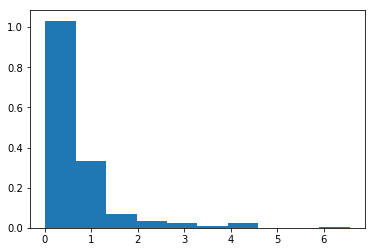

In [34]:
import scipy.stats as stats
h=prediction_train_score_values
#fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
#plt.plot(h,'-o')
plt.hist(h,normed=True)      #use this to draw histogram of your data
plt.show()

In [35]:
# Reading json data from url
import requests
import pandas
dataJson = requests.get("https://34.240.232.82/api/PrintbeatService/whisperContent/lastRequests"
                  ,verify=False).json()



C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [36]:
# printing first element

dataJson[0]

{'element': '1',
 'id': 347,
 'phone_model': 'Samsung SM-G930F',
 'result_url': 'https://34.240.232.82/results_sample_2018-03-29T13:02:45.283Z_1__testing_app._ignore._.txt',
 'test_reason': 'system ok, testing application ',
 'test_reason_comments': '_testing app. ignore.',
 'test_result_comments': None,
 'time': '2018-03-29T13:02:52.000Z',
 'wave_url': 'https://34.240.232.82/sample_2018-03-29T13:02:45.283Z_1__testing_app._ignore._.wav'}

In [37]:
# printing first record wav url 

dataJson[0]['wave_url']

'https://34.240.232.82/sample_2018-03-29T13:02:45.283Z_1__testing_app._ignore._.wav'

In [38]:
# saving wav file 

import urllib
import ssl

context = ssl._create_unverified_context()

f = urllib.request.urlopen(dataJson[0]['wave_url'], context=context)
dataWav = f.read()
with open("C:/git/cropped/table22.mp3", "wb") as code:
    code.write(dataWav)


In [39]:
# saving data into csv file 
import json
import csv
fieldnames = ['id', 'time','result_url', 'wave_url', 'element', 'phone_model', 'test_reason', 'test_result_comments', 'test_reason_comments']
csvfile=open('C:/git/cropped/table32.csv', 'w')
writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
writer.writeheader()
for datain in dataJson:
    writer.writerow(datain)

   